## ⭐ cross-cell impute test

In [1]:
import xchrom as xc
import scanpy as sc

In [7]:
rna = sc.read_h5ad('../../0_preprocess/processed_data/test_rna_harmony.h5ad') 
rna0 = sc.read_h5ad('../../0_preprocess/processed_data/test_rna.h5ad') 
rna0 = xc.tl.calc_pca(rna0,max_value=10,n_comps=32) ## provide X_pca to compute neighbors
rna0.obsm['X_pca_harmony'] = rna.obsm['X_pca_harmony']
ad = sc.read_h5ad('../../0_preprocess/test_data/ad.h5ad')

/home/miaoyuanyuan/miniconda3/envs/py3.8_tf2.6.0/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


2025-08-18 23:13:56.585784: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-18 23:13:58.787847: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 19276 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:31:00.0, compute capability: 8.6
2025-08-18 23:13:58.788992: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22350 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:4b:00.0, compute capability: 8.6
2025-08-18 23:13:58.789957: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:l

Predict done! prediction shape is: (53735, 4220)


/home/miaoyuanyuan/miniconda3/envs/py3.8_tf2.6.0/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


neighbor score(100)=0.3436,label score(100)=0.7813
neighbor score(50)=0.2543,label score(50)=0.8177
neighbor score(10)=0.1165,label score(10)=0.8644


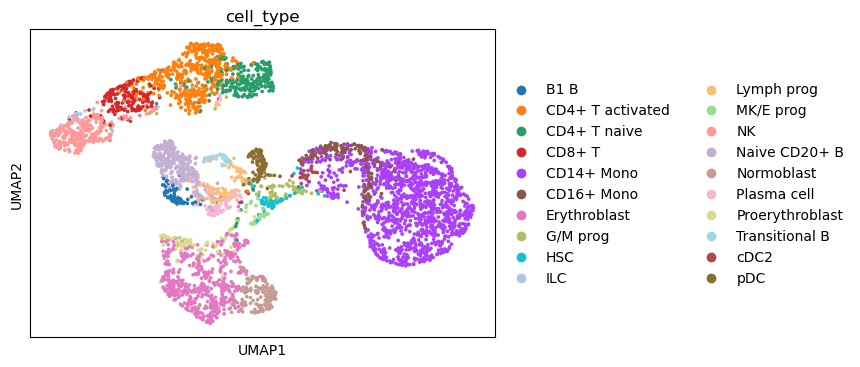

In [8]:
#### 2- calculate cross-samples ns & ls
metrics2 = xc.tl.crosssamples_nsls(
    cell_embedding_ad=rna0,
    input_folder='../../0_preprocess/test_data',
    model_path='../model_train/train_out/E1000best_model.h5',
    output_path='./',
    cellembed_raw='X_pca_harmony',
    celltype = 'cell_type',
    use_rep_rna = 'X_pca',
    save_pred=True,
    plot_umap=True
    )

/home/miaoyuanyuan/miniconda3/envs/py3.8_tf2.6.0/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


neighbor score(100)=0.1725,label score(100)=0.5608
neighbor score(50)=0.1097,label score(50)=0.5998
neighbor score(10)=0.0371,label score(10)=0.6621


<AxesSubplot:title={'center':'cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>

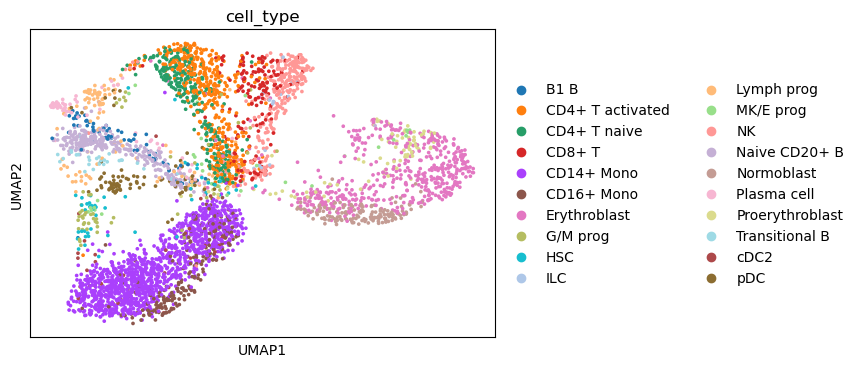

In [10]:
## raw_ATAC 
import matplotlib.pyplot as plt

ad1 = ad.copy()
ad1 = xc.tl.calc_pca(ad1)
ns,ls= xc.tl.calc_nsls_score(rna0,ad1,100,'cell_type',use_rep_rna = 'X_pca',use_rep_atac='X_pca')
print(f'neighbor score(100)={ns:.4f},label score(100)={ls:.4f}')

ns,ls= xc.tl.calc_nsls_score(rna0,ad1,50,'cell_type',use_rep_rna = 'X_pca',use_rep_atac='X_pca')
print(f'neighbor score(50)={ns:.4f},label score(50)={ls:.4f}')

ns,ls= xc.tl.calc_nsls_score(rna0,ad1,10,'cell_type',use_rep_rna = 'X_pca',use_rep_atac='X_pca')
print(f'neighbor score(10)={ns:.4f},label score(10)={ls:.4f}')

f, ax = plt.subplots(1, 1, figsize=(6, 4))
sc.pl.umap(ad1, color='cell_type', ax=ax, show=False)